Principal Component Analysis (PCA), just like clustering is a partitioning of the dataset based on proximity, we could think of PCA as a partitioning of the variation in the data. PCA is a great tool to help us discover important relationships in the data and can also be used to create more informative features.

* NOTE: PCA is typically applied to standardized data. With standardized data "variation" means "correlation". With unstandardized data "variation" means "covariance". 

### Principal Component Analysis

Example with Abalone dataset, with Height and Diameter of their shells.

<img src="https://i.imgur.com/rr8NCDy.png">

The shorter axis we might call the "Size" component: small height and small diameter (lower left) contrasted with large height and large diameter (upper right). The longer axis we might call the "Shape" component: small height and large diameter (flat shape) contrasted with large height and small diameter (round shape).

Size and Shape are another way to describe the data(the shells), this is the idea of PCA, instead of describing the data with the original features, we describe it with its axes of variation. The axes of variation become the new features.

<img src='https://i.imgur.com/XQlRD1q.png'>

The new features PCA constructs are actually just linear combinations (weighted sums) of the original features:

* df["Size"] = 0.707 * X["Height"] + 0.707 * X["Diameter"]
* df["Shape"] = 0.707 * X["Height"] - 0.707 * X["Diameter"]


A component's loadings tell us what variation it expresses through signs and magnitudes:

|Features \ Components | Size (PC1) | Shape (PC2)|
| --- | --- | --- |
|Height	|0.707	|0.707|
|Diameter|	0.707|	-0.707|


This table of loadings is telling us that in the Size component, Height and Diameter vary in the same direction (same sign), but in the Shape component they vary in opposite directions (opposite sign). In each component, the loadings are all of the same magnitude and so the features contribute equally in both.

<img src='https://i.imgur.com/xWTvqDA.png'>


There will be as many pricipal components as there are features in the original dataset. The Size componnent captures the majority of the variation between H and D. It's important to remember, the amount of variance in a component doesnt necessarily correspond to how good it is as predictor: It depends on what you're trying to predict. 

### PCA as Feature Engineering

Two ways of using PCA as feature engineering

* The first way is to use it as a descriptive technique. Since the components tell us about the variation, we could compute the MI scores for the components and see what kind of variation is most predictive of our target. That could give us ideas for kinds of features ot create -- a product of H and D if Size is important, or a ratio of H and D if Shape is important. we could even try clustering on one or more of the high-scoring components.


* THe Second way is to use the components themselves as features. Because the components exposes the variational structure of the data directly, they can often be more informative than the original features. Here are some use-cases:

     - Dimensionality reduction: When our features are highly redundant(multicolinear), PCA will parition out the redundancy into one or more ner-zero variance components, which we can the drop since they will contain little or no information.
 
     - Anomaly detection: Unusual variation, not apparent from the original features, will often show up in the low-variance. These components could be highly informative in an anomaly or outlier detection task.
 
     - Noise reduction: A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the singal-to-noise ratio.
 
     - Decorrelation: Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for our algorithm to work with.


PCA basically gives you direct access to the correlational structure of our data. You will no doubt come up with application of our own!


#### PCA Best Practices
There  are a few things to keep in mind when applying PCA:
* PCA only works with numeric features, like continiuous quantities or counts
* PCA is sensitive to scale. It's good practice to standardize our data before applying PCA, unless we know we have good reason not to.
* Consider removing or constraining outliers, since they can have an undue influence on the results.

### Working on Example - 1985 Automobiles
In this example, we will apply PCA using it as a descriptive technique to discover features. we'll look at other use-cases in the excercise.

In [47]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

#set up style 
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc("axes",
      labelweight='bold',
      labelsize='large',
      titleweight='bold',
      titlesize=14,
      titlepad=10,)


#defines functions plot_variance and make_mi_scores
def plot_variance(pca, width=8, dpi=100):
    #create figure
    fig, axs = plt.subplots(1,2)
    n = pca.n_components_
    grid = np.arange(1, n+1)
    
    #Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel='Component', title="% Explained Variance", ylim=(0.0, 1.0))
    
    #Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))
    
    #set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_score(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

df = pd.read_csv("./data/autos.csv")

In [38]:
df.head(5)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [39]:
#features with high MI score with the target, price
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

#standardize, since these features are not on the same scale
X_scaled = (X- X.mean(axis=0))/ X.std(axis=0)

In [40]:
X_scaled.head(5)

,highway_mpg,engine_size,horsepower,curb_weight
0,-0.555613,0.045098,0.198054,-0.025646
1,-0.555613,0.045098,0.198054,-0.025646
2,-0.702307,0.574066,1.330822,0.496473
3,-0.115531,-0.459826,-0.039037,-0.426254
4,-1.289083,0.189362,0.303427,0.498371


In [41]:
#pca import
from sklearn.decomposition import PCA

#create PCA estimator and fit data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#convert to dataframe
component_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head(5)

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


After fitting, the PCA instance contains the loadings in its components_ attribute

In [42]:
#make the loadings
loadings = pd.DataFrame(pca.components_.T, #transpose the matrix of loadings
                       columns=component_names,
                       index=X.columns #the rows are our orignal features
                       )

loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


PC1 tells us that large, powerful car will have poor gas milage(highway_mpg) and vice versa, PC3 shows a contrast between curb_weight and horsepower, very informative

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

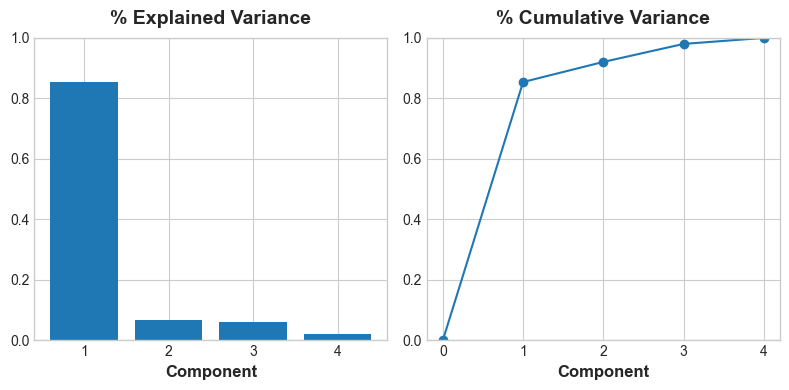

In [43]:
#plotting
plot_variance(pca)

In [48]:
#mi scores
mi_scores = make_mi_score(X_pca, y, discrete_features=False)
mi_scores

PC1    1.014615
PC2    0.379597
PC3    0.307272
PC4    0.205029
Name: MI Scores, dtype: float64

PC1 is highly informative, though the remaining components, despite their small variance, still have a significant relationship with price. Examining those components could be worthwhile to find relationships not captured by the main axis in PC1

In [52]:
#show dataframe sorted by PC3
idx = X_pca['PC3'].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485
